In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

In [66]:
movies = 'data/ml-latest/movies.csv'
ratings = 'data/ml-latest/ratings.csv'

df_movies = pd.read_csv(movies, usecols=['movieId', 'title'], dtype={'movieId':'int32', 'title':'str'})
df_ratings = pd.read_csv(ratings, usecols=['userId', 'movieId', 'rating'], dtype={'userId':'int32', 'movieId': 'int32', 'rating':'float32'})

### a) EDA

In [67]:
df_movies.info()
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int32 
 1   title    86537 non-null  object
dtypes: int32(1), object(1)
memory usage: 1014.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 387.2 MB


In [68]:
df_movies.shape

(86537, 2)

In [69]:
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [70]:
df_ratings.head(10)

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
5,1,381,3.5
6,1,596,4.0
7,1,1036,5.0
8,1,1049,3.0
9,1,1066,4.0


In [71]:
num_movies = df_movies.shape
num_ratings = df_ratings.shape
print(f'\nTotal number of movies and columns: {num_movies}')
print(f'Total number of ratings and columns: {num_ratings}')


Total number of movies and columns: (86537, 2)
Total number of ratings and columns: (33832162, 3)


### b) De 10 filmer med flest ratings

In [72]:
ratings_count = df_ratings['movieId'].value_counts()

top_10_movies = ratings_count.head(10)

top_10_movie_title = df_movies[df_movies['movieId'].isin(top_10_movies.index)]

print(top_10_movie_title[['movieId', 'title']])

      movieId                                              title
257       260          Star Wars: Episode IV - A New Hope (1977)
292       296                                Pulp Fiction (1994)
314       318                   Shawshank Redemption, The (1994)
351       356                                Forrest Gump (1994)
475       480                               Jurassic Park (1993)
522       527                            Schindler's List (1993)
585       593                   Silence of the Lambs, The (1991)
1166     1196  Star Wars: Episode V - The Empire Strikes Back...
2480     2571                                 Matrix, The (1999)
2867     2959                                  Fight Club (1999)


### c) Genomsnittliga ratingen för de 10 filmerna med flest ratings

In [83]:
# 10 filmer med flest betyg
top_10_movies = df_ratings['movieId'].value_counts().head(10).index

# Filtrerar betyg för de 10 filmer med flest betyg
ratings_top_10 = df_ratings[df_ratings['movieId'].isin(top_10_movies)]

# Beräknar genomsnittligt betyg för varje film
average_ratings_top_10 = ratings_top_10.groupby('movieId')['rating'].mean().reset_index(name='avg_ratings')

print('Average Ratings for Top 10 Movies')
print(average_ratings_top_10)


Average Ratings for Top 10 Movies
   movieId  avg_ratings
0      260     4.092401
1      296     4.191778
2      318     4.416792
3      356     4.068189
4      480     3.689013
5      527     4.242337
6      593     4.150287
7     1196     4.118030
8     2571     4.160631
9     2959     4.236019


### d) Plot över årtal och antalet filmer

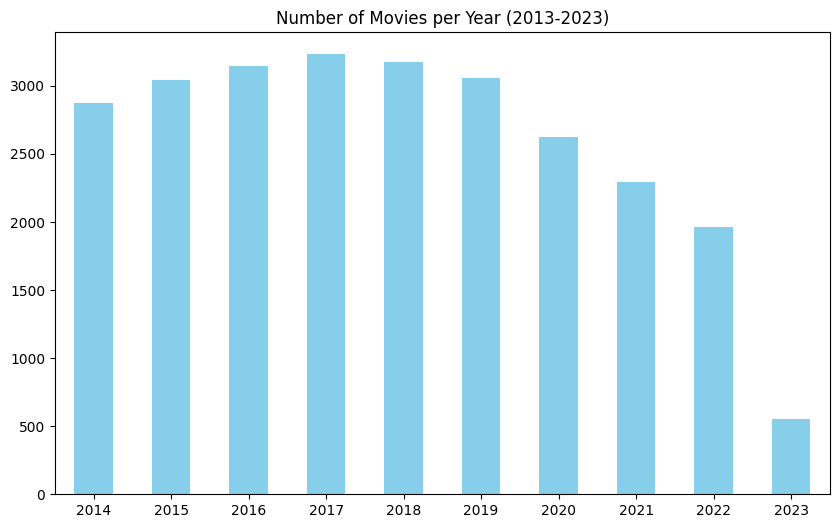

In [85]:
# Extraherar år från titeln: (r'\((\d{4})\)') tar 4 siffror inom parentes, i detta fall år
df_movies['year'] = df_movies['title'].str.extract(r'\((\d{4})\)')

# Konverterar året till numeriskt format
df_movies['year'] = df_movies['year'].apply(lambda x: pd.to_numeric(x, errors='coerce')).astype('Int32')

# Filtrerar ut filmer mellan 2014 och 2023
df_movies_filtered = df_movies[(df_movies['year'] >= 2014) & (df_movies['year'] <= 2023)]

# Grupperar och beräknar antalet filmer per år
movies_per_year_filtered = df_movies_filtered.groupby('year').size()

# Sorterar resultatet i fallande ordning och tar de sista 10 åren
movies_per_year_filtered_sorted = movies_per_year_filtered.sort_index(ascending=True).head(11)

fig, ax = plt.subplots(figsize=(10, 6))
movies_per_year_filtered_sorted.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Number of Movies per Year (2013-2023)')
ax.set_xlabel('')
ax.tick_params(axis='x', rotation=0)
plt.show()


### e) Plot över antalet ratings mot movieId

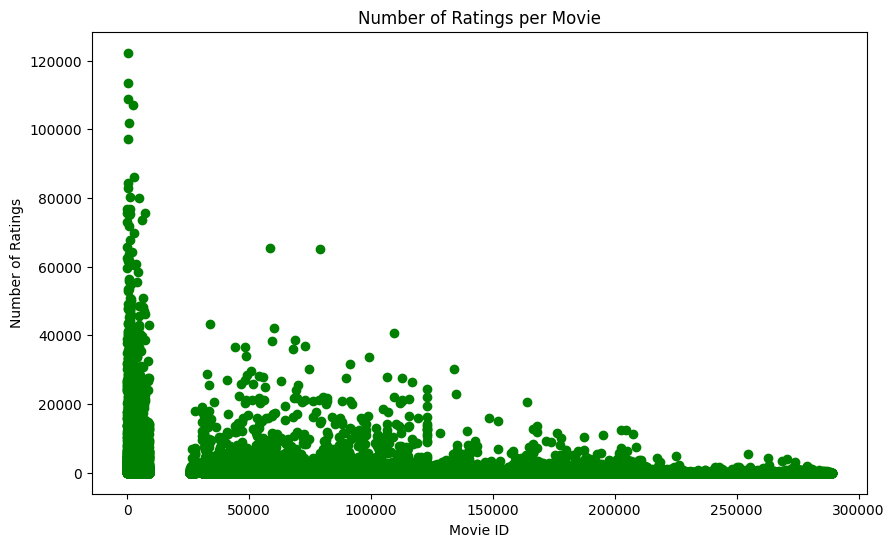

In [99]:
# Antalet betyg per film
ratings_per_movie = df_ratings.groupby('movieId').size()

fig, ax = plt.subplots(figsize=(10, 6))
# Plottar antalet betyg mot movieId
ax.plot(ratings_per_movie.index, ratings_per_movie.values, marker='o', linestyle='', color='green')
ax.set_title('Number of Ratings per Movie')
ax.set_xlabel('Movie ID')
ax.set_ylabel('Number of Ratings')
plt.show()


### f) Genomsnittliga ratings för de top 10 filmerna med flest ratings

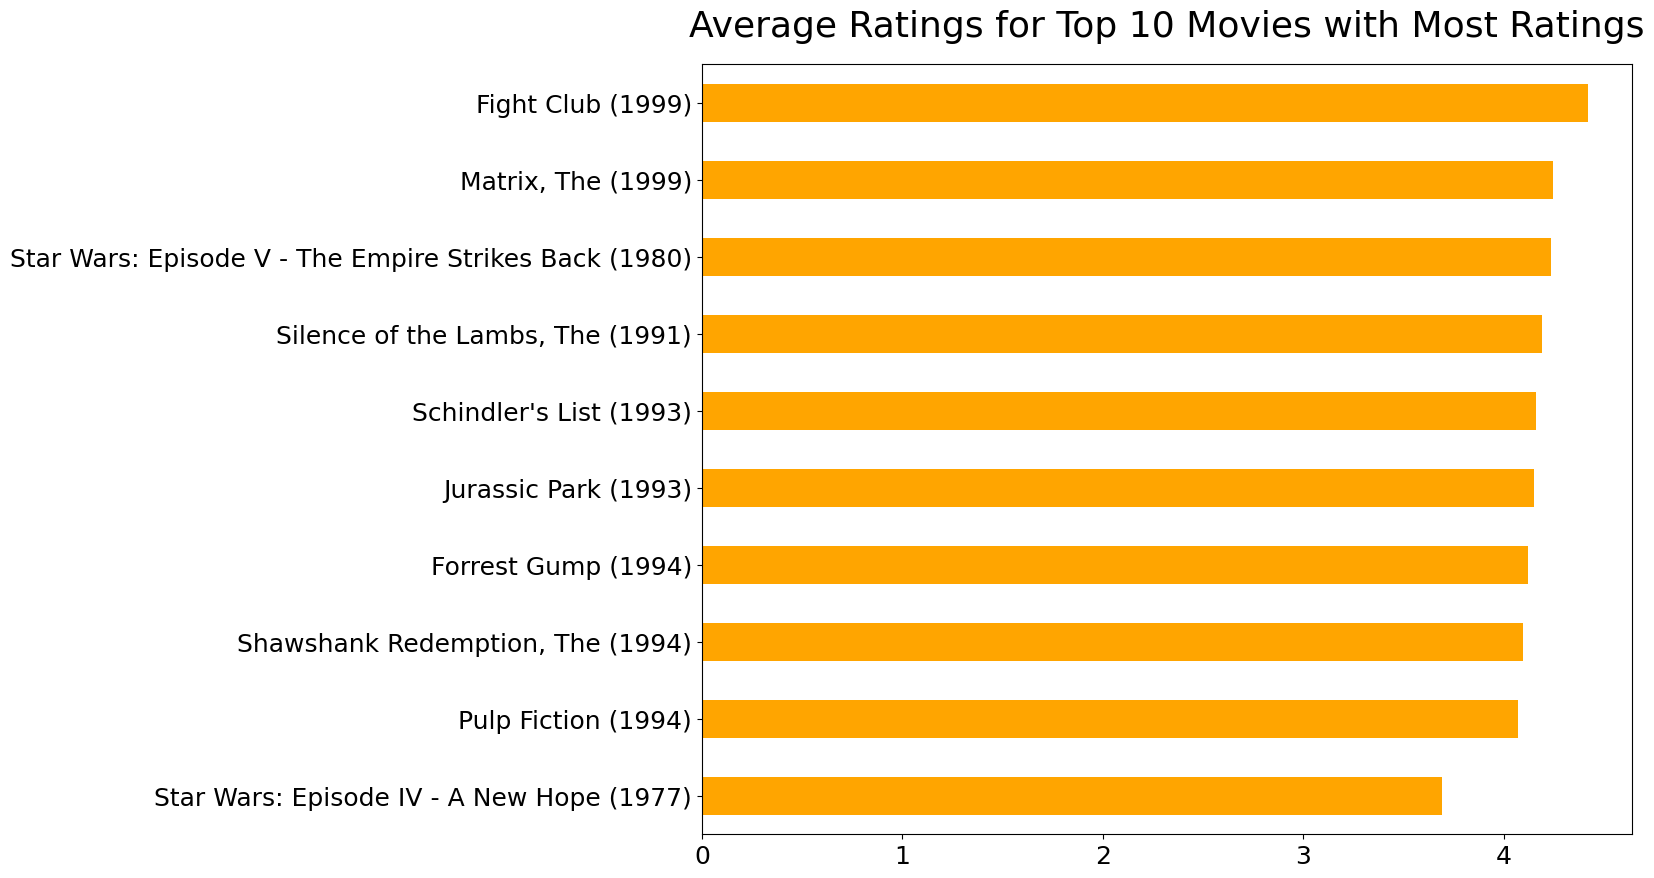

In [ ]:
# 10 filmer med flest betyg
top_10_movies = df_ratings['movieId'].value_counts().head(10).index

# Filtrerar betyg för de 10 filmer med flest betyg
ratings_top_10 = df_ratings[df_ratings['movieId'].isin(top_10_movies)]

# Beräknar genomsnittligt betyg för varje film
average_ratings_top_10 = ratings_top_10.groupby('movieId')['rating'].mean()

# Hämtar titlar för de 10 filmer med flest betyg
movie_titles = df_movies[df_movies['movieId'].isin(top_10_movies)].set_index('movieId')['title']

# Sortera betygen i stigande ordning
average_ratings_top_10_sorted = average_ratings_top_10.sort_values(ascending=True)

# Använder filmernas titlar som index för average_ratings_top_10_sorted
average_ratings_top_10_sorted.index = movie_titles

# Plottar med liggande staplar
plt.figure(figsize=(12, 10))
average_ratings_top_10_sorted.plot(kind='barh', color='orange')
plt.title('Average Ratings for Top 10 Movies with Most Ratings', pad=20, font=dict(size=26))
plt.ylabel('')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()


## 1.2

In [ ]:
from scipy.sparse import csr_matrix

# Filtrerar ut användare och filmer baserat på antal betyg som getts och mottagits
min_user_ratings = 100
min_movie_ratings = 1000

# Antalet betyg per användare och film
user_counts = df_ratings['userId'].value_counts()
movie_counts = df_ratings['movieId'].value_counts()

# Filtrerar användare och filmer baserat på antal betyg
filtered_users = user_counts[user_counts >= min_user_ratings].index
filtered_movies = movie_counts[movie_counts >= min_movie_ratings].index

# Filtrerar DataFramen för att bara behålla betyg från dessa användare och filmer
df_filtered = df_ratings[(df_ratings['userId'].isin(filtered_users)) & (df_ratings['movieId'].isin(filtered_movies))]

# Betyg baserat på användare och filmer
min_rating = 1
max_rating = 5
df_filtered = df_filtered[(df_filtered['rating'] >= min_rating) & (df_filtered['rating'] <= max_rating)]

# Använder alternativa betygsformat ( i detta fall binära betyg)
df_filtered['binary_rating'] = (df_filtered['rating'] > 3).astype(int)

# Skapar en gles matris från den filtrerade DataFramen
sparse_matrix = csr_matrix((df_filtered['rating'], (df_filtered['movieId'], df_filtered['userId'])))

# Resultatet blir en gles matris där varje rad representerar en film och varje kolumn representerar en användare,
# och varje cell innehåller betyget som användaren har gett filmen


## 1.3

In [ ]:
model_knn = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=20)

In [ ]:
model_knn.fit(df_filtered) # Här använder vi redan .fit

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [ ]:
def recommender(movie_name, model, n_recommendations):
    idx = process.extractOne(movie_name, df_movies["title"])[2]
    print("Movie Selected: ", df_movies["title"][idx], "Index: ", idx)
    print("Searching for recommendations....")
    distances, indices = model.kneighbors(sparse_matrix[idx].reshape(1, -1), n_neighbors=n_recommendations)
    for i in indices:
        print(df_movies["title"][i].where(i != idx))

recommender("fight club", model_knn,20)

Movie Selected:  Fight Club (1999) Index:  2867
Searching for recommendations....


c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


ValueError: X has 330976 features, but NearestNeighbors is expecting 4 features as input.